# 2 偏差图

## 2.3 发散型包点图

横坐标：里程<br>
纵坐标：汽车名称

### 2.3.1 导入绘图需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.3.2 认识绘制包点图的函数

**plt.scatter()**

>重要参数
>>x,y：绘制散点图的数据<br>
>>s：散点的大小<br>
>>c：散点的颜色<br>
>>marker：散点的形状（默认是圆形）

**plt.text()**

>重要参数
>>x,y：文本放置的位置坐标<br>
>>s：文本的内容<br>
>>horizontalalignment：水平对齐控制参数，center、left、right可选<br>
>>verticalalignment：垂直对齐控制参数，top、bottom、center、baseline、center_baseline可选

### 2.3.3 绘制简单的散点图和文本图

In [2]:
data = np.random.randn(10) #生成10个满足标准正态分布的随机数
data

array([ 0.65198145, -0.10446332,  0.30830665, -1.04679467, -1.20243127,
        1.67628812,  0.49451061, -2.45706216,  1.11921068, -0.25165026])

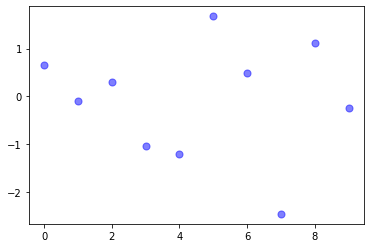

In [4]:
plt.scatter(range(10)
           ,data
           ,s = 50
           ,c = 'b'
           ,alpha = 0.5
           )

Text(0.6, 0.5, 'text')

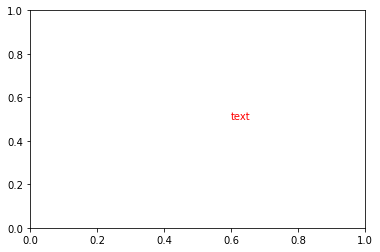

In [6]:
plt.text(0.6, 0.5
        ,'text'
        ,fontdict = {'color': 'red', 'size': 10}
        )

In [7]:
zip(range(10), data)

In [8]:
[*zip(range(10), data)]

[(0, 0.6519814542746628),
 (1, -0.1044633202784385),
 (2, 0.30830664693655313),
 (3, -1.0467946739614191),
 (4, -1.2024312674933526),
 (5, 1.6762881241473735),
 (6, 0.49451060906367794),
 (7, -2.4570621635052374),
 (8, 1.1192106791704726),
 (9, -0.2516502637329962)]

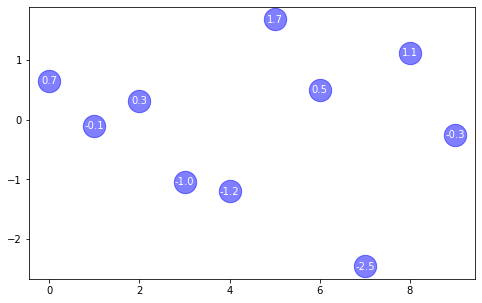

In [10]:
plt.figure(figsize = (8,5))

plt.scatter(range(10)
           ,data
           ,s = 500
           ,c = 'b'
           ,alpha = 0.5
           )

for x,y in zip(range(10),data):
    plt.text(x,y,round(y,1),fontdict = {'size':10, 'color':'w'}
            ,horizontalalignment = 'center'
            ,verticalalignment = 'center')

### 2.3.4 认识绘图数据集

In [12]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

In [13]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [14]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [15]:
df['mpg'].values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [16]:
df['carname'].values

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

In [17]:
#提取目标特征
x = df.loc[:,['mpg']] #返回dataframe，df.loc[:,'mpg']返回series
#z-score标准化处理
df['mpg_z'] = (x - x.mean()) / x.std()
#生成颜色标签
df['colors'] = ['green' if x > 0 else 'red' for x in df['mpg_z']]
#根据标准化之后的数据，对整个数据集进行排序
df.sort_values('mpg_z', inplace = True)
#重置整个数据集的索引
df.index = range(df.shape[0])

In [18]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


### 2.3.5 绘制发散型包点图

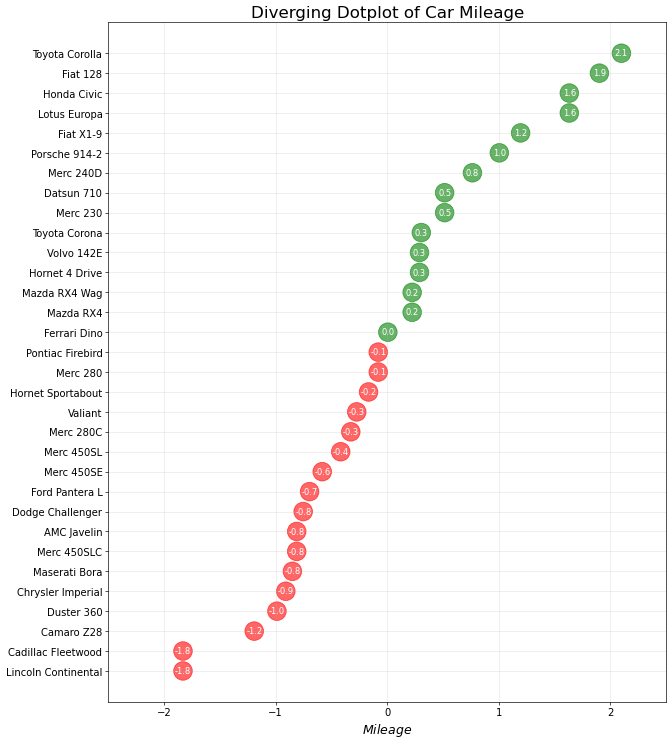

In [20]:
#添加画布并设定画布大小
plt.figure(figsize = (12,15), dpi = 60)
#绘制散点图
plt.scatter(df.mpg_z, df.index, s = 500, alpha = 0.6, color = df.colors)
#添加文本
for x,y,text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x,y #文本位置：横纵坐标
            ,round(text,1) #文本内容
            ,fontdict={'color':'w','size':10} #白色，10号字体
            ,horizontalalignment = 'center'
            ,verticalalignment = 'center'
            )
#添加装饰
plt.title('Diverging Dotplot of Car Mileage', fontsize = 20)
plt.xlabel('$Mileage$', fontsize = 15) #斜体Mileage
plt.xticks(fontsize = 12)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xlim(-2.5, 2.5)
plt.grid(linestyle = '-', alpha = 0.3)

目标图形弱化了图形的边框

**方法一：直接使用命令式plt来进行修饰图形**<br>
plt.gcf()：Get Current Figure<br>
plt.gca()：Get Current Axes

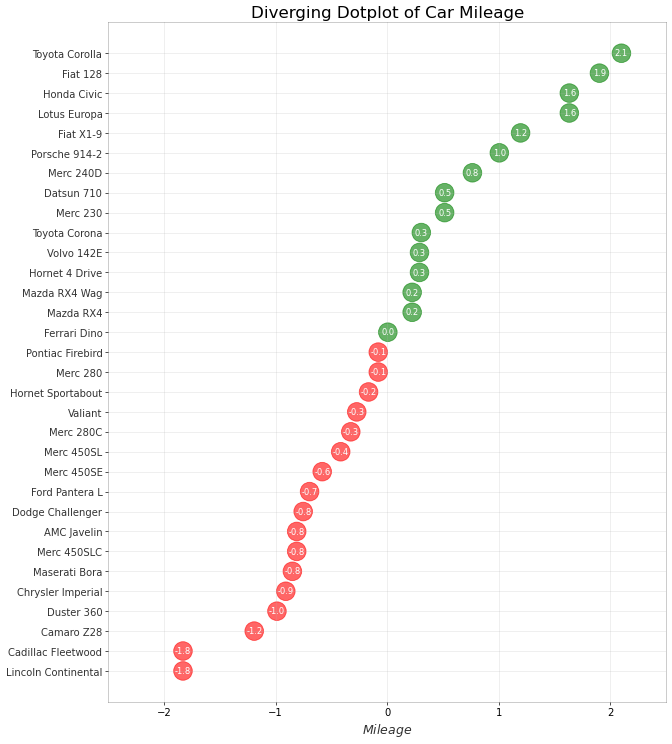

In [25]:
#添加画布并设定画布大小
plt.figure(figsize = (12,15), dpi = 60
          #,facecolor = 'lightblue'
          )
#绘制散点图
plt.scatter(df.mpg_z, df.index, s = 500, alpha = 0.6, color = df.colors)
#添加文本
for x,y,text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x,y #文本位置：横纵坐标
            ,round(text,1) #文本内容
            ,fontdict={'color':'w','size':10} #白色，10号字体
            ,horizontalalignment = 'center'
            ,verticalalignment = 'center'
            )
#轴的处理过程
plt.gca().spines['right'].set_alpha(.3) #右轴变浅
plt.gca().spines['left'].set_alpha(.3) #右轴变浅
plt.gca().spines['bottom'].set_alpha(.3) #右轴变浅
plt.gca().spines['top'].set_alpha(.3) #右轴变浅

#添加装饰
plt.title('Diverging Dotplot of Car Mileage', fontsize = 20)
plt.xlabel('$Mileage$', fontsize = 15, alpha = 0.8) #斜体Mileage
plt.xticks(fontsize = 12)
plt.yticks(df.index, df.carname, fontsize = 12, alpha = 0.8)
plt.xlim(-2.5, 2.5)
plt.grid(linestyle = '-', alpha = 0.3)

**方法二：把画布和子图对象分开操作**<br>
使用fig, ax = plt.subplots()

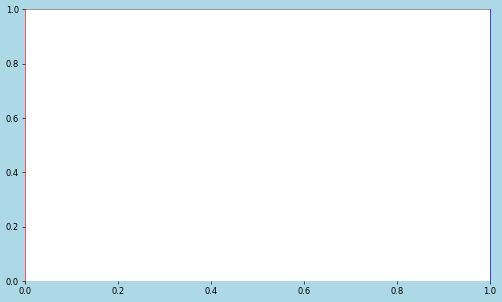

In [26]:
fig, ax = plt.subplots(figsize = (10,6)
                      #,facecolor = 'white'
                      ,facecolor = 'lightblue'
                      ,dpi = 60
                      )
ax.spines['left'].set_color('red')
ax.spines['right'].set_color('blue')
ax.spines['bottom'].set_color('None')
ax.spines['top'].set_alpha(0.6)

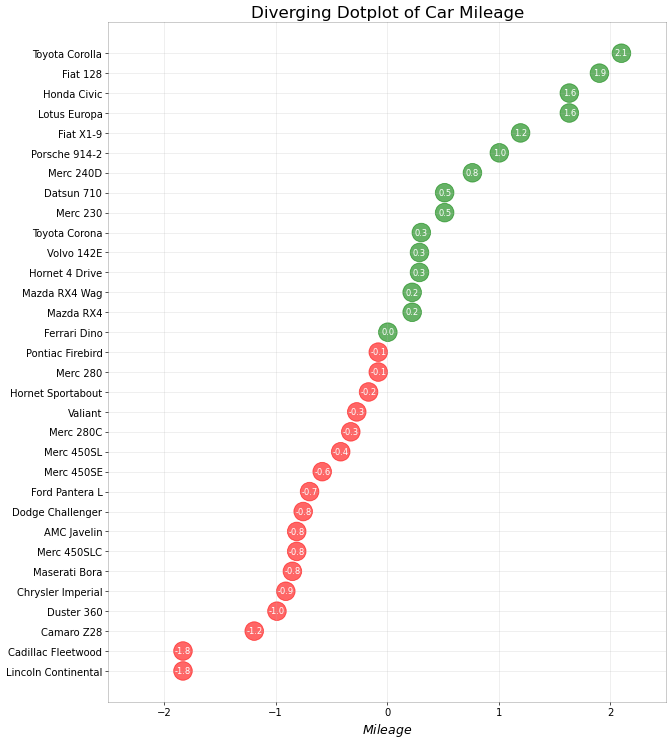

In [27]:
#创建画布并设置画布大小
fig, ax = plt.subplots(figsize=(12,15)
                      ,facecolor = 'white'
                      ,dpi = 60
                      )
#绘制散点图
plt.scatter(df.mpg_z
           ,df.index
           ,s = 500
           ,alpha = 0.6
           ,color = df.colors
           )
#添加文本
for x, y, text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x, y
            ,round(text ,1)
            ,fontdict = {'color': 'w', 'size': 10}
            ,horizontalalignment = 'center'
            ,verticalalignment = 'center'
            )
#虚化图形边框
ax.spines['left'].set_alpha(0.3)
ax.spines['right'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)
ax.spines['top'].set_alpha(0.3)
#添加装饰
plt.title('Diverging Dotplot of Car Mileage', fontsize = 20)
plt.xlabel('$Mileage$', fontsize = 15) #斜体Mileage
plt.xticks(fontsize = 12)
plt.yticks(df.index, df.carname, fontsize = 12)
plt.xlim(-2.5, 2.5)
plt.grid(linestyle = '-', alpha = 0.3)

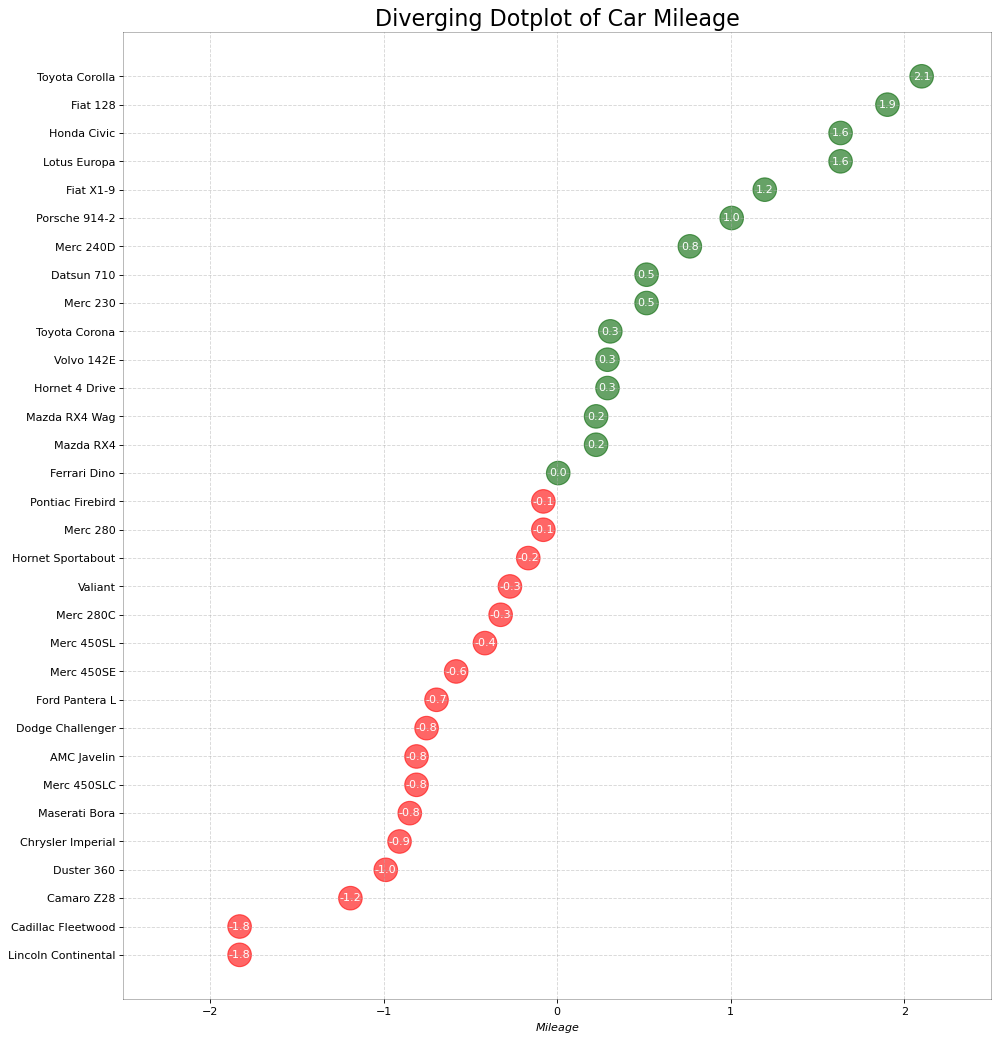

In [31]:
#源代码

#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']] #提取目标变量
df['mpg_z'] = (x - x.mean())/x.std() #z-score标准化
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True) #排序
df.reset_index(inplace=True) #重置索引

# Draw plot
plt.figure(figsize = (14,16), dpi = 80) #创建画布
plt.scatter(df.mpg_z, df.index, s = 450, alpha = .6, color = df.colors) #绘制散点图
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z): #添加文本
    t = plt.text(x, y, round(tex, 1), horizontalalignment = 'center', verticalalignment = 'center', fontdict = {'color': 'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars) #修改y轴刻度标签
plt.title('Diverging Dotplot of Car Mileage', fontdict = {'size': 20}) #添加标题并设定标题字体大小
plt.xlabel('$Mileage$') #添加x轴标签
plt.grid(linestyle = '--', alpha = 0.5) #配置网格线
plt.xlim(-2.5, 2.5) #设定x轴最大最小值
plt.show() #本地显示